In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import json
import pandas as pd
import traceback

sys.path.append(".") # add results folder as a python path 
from viz import *
from analyze import *

In [2]:
# Global variables and statistics
dataset = 'bm1'
benchmark_name = 'CNN in Keras on MNIST'
num_trials =10


In [3]:
# Read sequential optimization results
div10_results = {}
div20_results = {}
bo_results  = {}
opt_secs = 7200
s_path = "./{}/T{}S/".format(dataset, opt_secs)
div20_results['S-Div'] = load_json(s_path + 'DIV-SEQ.hybrid-deca.HPO_runner.ETR-DecaTercet(6)' + '.json')


In [4]:
max_accs = []
for i in range(6):
    max_acc = max(div20_results['S-Div'][str(i)]['accuracy'])
    print(max_acc)
    max_accs.append(max_acc)
print("avg. {:.4f} ({:.4f})".format(np.mean(max_accs), np.std(max_accs)))    

0.9938
0.9932
0.9941
0.9939
0.9941
0.9934
avg. 0.9938 (0.0003)


<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

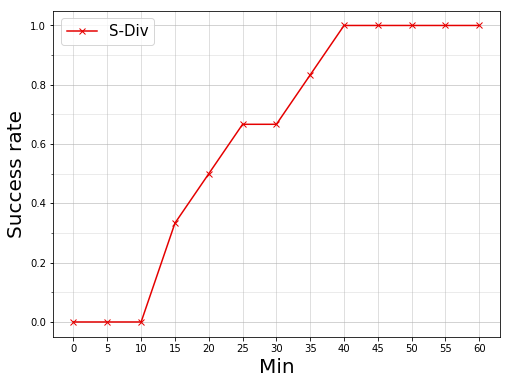

In [10]:
draw_success_rate_fig(div20_results, 0.993, 60*1 +1, 
                                              x_unit='Min', step_size=5,
                                              num_runs=6,
                                              div=[ 'S-Div'], legend={'loc': 2},
                                                 width=8, height=6)

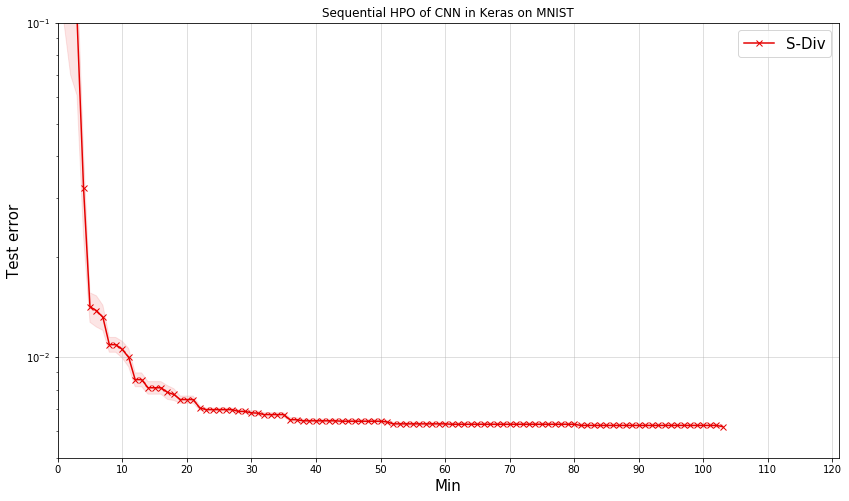

<module 'matplotlib.pyplot' from '/home/webofthink/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [9]:
draw_best_error_curve(div20_results, ["S-Div"], 6, ylim=(.005, .1), xlim=(0, 60*2+1), 
                      summary=True, x_steps=10, x_unit='Min', title="Sequential HPO of {}".format(benchmark_name))